# Медианный фильтр

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('./lena.png')

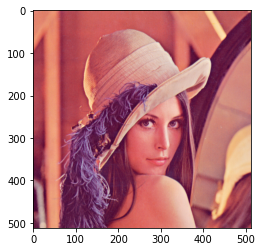

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img[...,::-1])

In [4]:
img.shape

(512, 512, 3)

In [18]:
def median_filter(img, ksize):
    
    ksize = ksize // 2
    
    result = np.zeros_like(img)
    for channel in range(img.shape[-1]):
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                result[row, col, channel] = img[row, col, channel]
                # TODO: определяем текущее положение окна в координатах изображения
                # TODO: вычислить медиану в окрестности х, y для окна размера ksize
                result[row, col, channel] = int(np.median(img[max(0,row-ksize):row+ksize+1, max(0,col-ksize):col+ksize+1, channel]))
    return result

## Добавляем случайный шум на изображение

In [9]:
test

array([[[ 91,  70, 214],
        [120, 133, 165],
        [104, 109, 217],
        [115,  95, 199]],

       [[ 83, 103, 123],
        [ 69,  71, 216],
        [ 84,  82, 212],
        [ 79, 109, 162]],

       [[ 83, 135, 217],
        [103,  87, 183],
        [131, 125, 180],
        [ 95,  77, 189]],

       [[ 88, 102, 183],
        [ 86,  71, 218],
        [118, 118, 136],
        [ 96,  70, 137]]], dtype=uint8)

In [8]:
test = noisy_img[:4, :4, :]

ksize = 3
ksize = ksize // 2

result = np.zeros_like(test)
for channel in range(test.shape[-1]):
    for row in range(test.shape[0]):
        for col in range(test.shape[1]):
            #print(test[row, col, channel])
            print(f'{test[row, col, channel]} {test[max(0,row-ksize):row+ksize+1, max(0,col-ksize):col+ksize+1, channel]}')
            print(f'{test[row, col, channel]} {int(np.median(test[max(0,row-ksize):row+ksize+1, max(0,col-ksize):col+ksize+1, channel]))}')
                

91 [[ 91 120]
 [ 83  69]]
91 87
120 [[ 91 120 104]
 [ 83  69  84]]
120 87
104 [[120 104 115]
 [ 69  84  79]]
104 94
115 [[104 115]
 [ 84  79]]
115 94
83 [[ 91 120]
 [ 83  69]
 [ 83 103]]
83 87
69 [[ 91 120 104]
 [ 83  69  84]
 [ 83 103 131]]
69 91
84 [[120 104 115]
 [ 69  84  79]
 [103 131  95]]
84 103
79 [[104 115]
 [ 84  79]
 [131  95]]
79 99
83 [[ 83  69]
 [ 83 103]
 [ 88  86]]
83 84
103 [[ 83  69  84]
 [ 83 103 131]
 [ 88  86 118]]
103 86
131 [[ 69  84  79]
 [103 131  95]
 [ 86 118  96]]
131 95
95 [[ 84  79]
 [131  95]
 [118  96]]
95 95
88 [[ 83 103]
 [ 88  86]]
88 87
86 [[ 83 103 131]
 [ 88  86 118]]
86 95
118 [[103 131  95]
 [ 86 118  96]]
118 99
96 [[131  95]
 [118  96]]
96 107
70 [[ 70 133]
 [103  71]]
70 87
133 [[ 70 133 109]
 [103  71  82]]
133 92
109 [[133 109  95]
 [ 71  82 109]]
109 102
95 [[109  95]
 [ 82 109]]
95 102
103 [[ 70 133]
 [103  71]
 [135  87]]
103 95
71 [[ 70 133 109]
 [103  71  82]
 [135  87 125]]
71 103
82 [[133 109  95]
 [ 71  82 109]
 [ 87 125  77]]
82 95


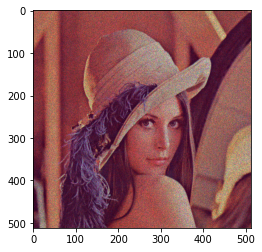

In [7]:
noisy_img = img.astype(float) + np.random.uniform(img.astype(float))
noisy_img = np.uint8(255. * np.abs(noisy_img) / np.max(np.abs(noisy_img)))
plt.imshow(noisy_img[...,::-1])

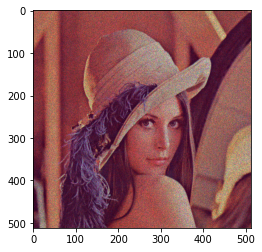

In [13]:
def median_filter_show(ksize = 5):
    filtered = median_filter(noisy_img, ksize)
    return plt.imshow(filtered[...,::-1]);

median_filter_show(ksize = 1)

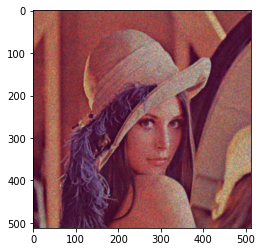

In [12]:
median_filter_show(ksize = 3)

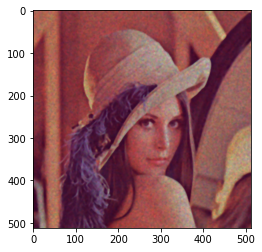

In [19]:
median_filter_show(ksize = 5)

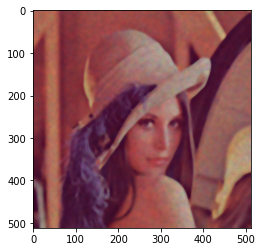

In [37]:
median_filter_show(ksize = 9)

<Figure size 792x432 with 0 Axes>

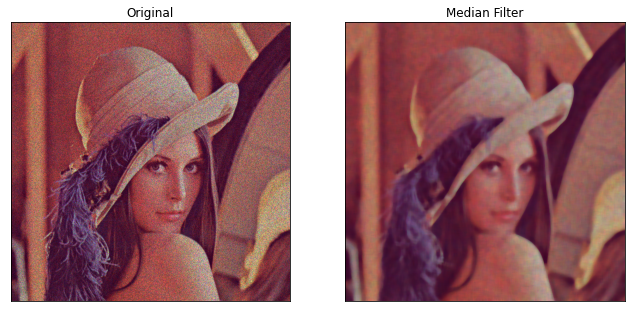

In [36]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline


figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(img,(figure_size, figure_size))
plt.figure(figsize=(11,6))



new_image = cv2.medianBlur(noisy_img, figure_size)

plt.figure(figsize=(11,6))
plt.subplot(121), 
plt.imshow(noisy_img[...,::-1]),
plt.title('Original')
plt.xticks([]),
plt.yticks([])

plt.subplot(122),
plt.imshow(new_image[...,::-1]),
plt.title('Median Filter')
plt.xticks([]), 
plt.yticks([])
plt.show()

In [24]:
from ipywidgets import interact

def median_filter_show(ksize = 5):
    filtered = median_filter(noisy_img, ksize)
    return plt.imshow(filtered[...,::-1]);

interact(median_filter_show, ksize = (1, 20, 1));

interactive(children=(IntSlider(value=5, description='ksize', max=20, min=1), Output()), _dom_classes=('widget…